In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import pylab
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset "Churn_Modelling"

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Pre-Processing

### part 1 : checing missing value

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Observation: There are no missing values

### part 2: Checking outlier - not required as this is a classification problem 

## part 3: Encoding Concept
### Label Encoding 
### One Hot Encoder
### Dummy Variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df['Geography'] = df['Geography'].astype('category')
df['Geography'] = df['Geography'].cat.codes
df = pd.get_dummies(df, columns=['Geography'])

df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df = pd.get_dummies(df, columns=['Gender'])

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2,Gender_0,Gender_1
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [8]:
df = df.drop(['RowNumber','CustomerId','Surname','Geography_0','Gender_0'],axis=1)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
x = df.drop(['Exited'],axis=1)
y = df['Exited']

In [11]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Part 4: Feature Scaling

In [13]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [14]:
x_sc

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

### Part 5: Checking Imbalance Dataset

In [15]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Since we are using XGBoost we do not need to fix Imbalance dataset

# Splitting the data into training and test

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=101)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 11)
(2500, 11)
(7500,)
(2500,)


# XGBoost Model

In [17]:
# fit the model to the training data
XGBoosting = XGBClassifier()
XGBoosting.fit(x_train, y_train)

[01:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
# making predictions using the model
y_pred_train = XGBoosting.predict(x_train)
y_pred_test = XGBoosting.predict(x_test)

### Evaluating the model

In [19]:
print(confusion_matrix(y_train,y_pred_train))
print('######################')
print(confusion_matrix(y_test,y_pred_test))

[[5950   38]
 [ 311 1201]]
######################
[[1851  124]
 [ 249  276]]


In [20]:
print(accuracy_score(y_train,y_pred_train))
print('######################')
print(accuracy_score(y_test,y_pred_test))

0.9534666666666667
######################
0.8508


In [21]:
print(classification_report(y_train,y_pred_train))
print('######################')
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5988
           1       0.97      0.79      0.87      1512

    accuracy                           0.95      7500
   macro avg       0.96      0.89      0.92      7500
weighted avg       0.95      0.95      0.95      7500

######################
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1975
           1       0.69      0.53      0.60       525

    accuracy                           0.85      2500
   macro avg       0.79      0.73      0.75      2500
weighted avg       0.84      0.85      0.84      2500



### Using K-Fold Method to increase the test accuracy(Cross Validation method)

In [22]:
accuracy_test_xg = cross_val_score(XGBoosting, x_test, y_test, cv=15)
print(accuracy_test_xg)

[01:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:01:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:01:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [23]:
accuracy_test_xg[12]

0.9397590361445783

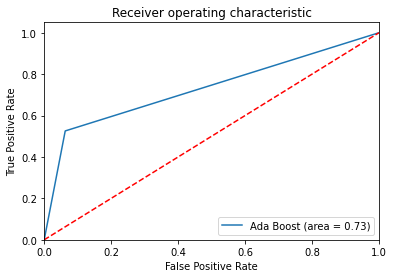

In [24]:
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)
plt.figure()
plt.plot(fpr, tpr, label='Ada Boost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# XGBoost Model

### Training Accuracy = 95%
### Test Accuracy = 94%

# Gradient Boosting

In [25]:
GBBoosting = GradientBoostingClassifier()
GBBoosting.fit(x_train, y_train)

GradientBoostingClassifier()

In [26]:
y_pred_train_GB = GBBoosting.predict(x_train)
y_pred_test_GB = GBBoosting.predict(x_test)

In [27]:
print(confusion_matrix(y_train,y_pred_train_GB))
print('######################')
print(confusion_matrix(y_test,y_pred_test_GB))

[[5816  172]
 [ 800  712]]
######################
[[1908   67]
 [ 261  264]]


In [28]:
print(accuracy_score(y_train,y_pred_train_GB))
print('######################')
print(accuracy_score(y_test,y_pred_test_GB))

0.8704
######################
0.8688


### Using Cross Validation(K-Fold) to increase training & test accuracy score

In [29]:
accuracy_training_cv_GB = cross_val_score(GBBoosting, x_train, y_train, cv = 20)
accuracy_test_cv_GB = cross_val_score(GBBoosting, x_test, y_test, cv = 20)

print(accuracy_training_cv_GB)
print('##############')
print(accuracy_test_cv_GB)

[0.864      0.81333333 0.86666667 0.888      0.856      0.864
 0.832      0.89333333 0.86666667 0.856      0.87466667 0.86133333
 0.856      0.85066667 0.85866667 0.84533333 0.872      0.86933333
 0.856      0.85866667]
##############
[0.816 0.84  0.84  0.864 0.888 0.912 0.816 0.832 0.856 0.864 0.832 0.856
 0.904 0.888 0.904 0.848 0.896 0.904 0.824 0.872]


In [30]:
print(accuracy_training_cv_GB[7])
print('##############')
print(accuracy_test_cv_GB[5])

0.8933333333333333
##############
0.912


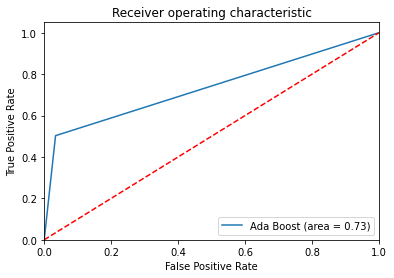

In [31]:
logit_roc_auc = roc_auc_score(y_test, y_pred_test_GB)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_GB)
plt.figure()
plt.plot(fpr, tpr, label='Ada Boost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# XGBoost Model

### Training Accuracy = 95%
### Test Accuracy = 94%

# Gradient Boosting

### Training Accuracy = 89%
### Test Accuracy = 91%

# AdaBoost Classifier

In [32]:
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(x_train, y_train)

AdaBoostClassifier()

In [33]:
y_pred_train_ada = AdaBoost.predict(x_train)
y_pred_test_ada = AdaBoost.predict(x_test)

In [34]:
print(accuracy_score(y_train,y_pred_train_ada))
print('################')
print(accuracy_score(y_test,y_pred_test_ada))

0.8593333333333333
################
0.8628


### Using Cross Validation(K-Fold) to increase training & test accuracy score

In [35]:
accuracy_training_cv_ada = cross_val_score(AdaBoost, x_train, y_train, cv=20)
accuracy_test_cv_ada = cross_val_score(AdaBoost, x_test, y_test, cv=20)

print(accuracy_training_cv_ada)
print('####################')
print(accuracy_test_cv_ada)

[0.85333333 0.816      0.864      0.87733333 0.85333333 0.86133333
 0.84       0.88266667 0.86666667 0.83733333 0.872      0.85066667
 0.85066667 0.85333333 0.83733333 0.848      0.86666667 0.83466667
 0.85333333 0.864     ]
####################
[0.824 0.824 0.856 0.832 0.856 0.88  0.8   0.864 0.864 0.848 0.808 0.872
 0.88  0.888 0.856 0.808 0.888 0.864 0.856 0.856]


In [36]:
print(accuracy_training_cv_ada[7])
print('####################')
print(accuracy_test_cv_ada[5])

0.8826666666666667
####################
0.88


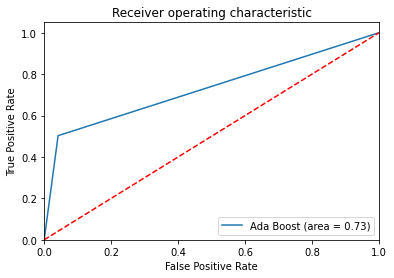

In [37]:
logit_roc_auc = roc_auc_score(y_test, y_pred_test_ada)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_ada)
plt.figure()
plt.plot(fpr, tpr, label='Ada Boost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# XGBoost Model

### Training Accuracy = 95%
### Test Accuracy = 94%

# Gradient Boosting

### Training Accuracy = 89%
### Test Accuracy = 91%

# Ada Boosting

### Training Accuracy = 88%
### Test Accuracy = 88%

### RandomForest Model

In [38]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [40]:
print(accuracy_score(y_train,y_pred_train_rf))
print('################')
print(accuracy_score(y_test,y_pred_test_rf))

1.0
################
0.8668


### Using Cross Validation(K-Fold) to increase test accuracy score

In [41]:
accuracy_test_cv_rf = cross_val_score(rf, x_test, y_test, cv = 20)

print(accuracy_test_cv_rf)

[0.824 0.88  0.848 0.864 0.904 0.888 0.864 0.824 0.808 0.872 0.856 0.872
 0.904 0.904 0.856 0.816 0.872 0.896 0.84  0.856]


In [42]:
print(accuracy_test_cv_rf[4])

0.904


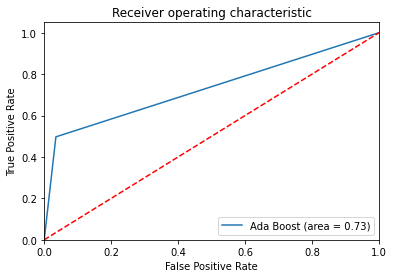

In [43]:
logit_roc_auc = roc_auc_score(y_test, y_pred_test_rf)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_rf)
plt.figure()
plt.plot(fpr, tpr, label='Ada Boost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# XGBoost Model

### Training Accuracy = 95%
### Test Accuracy = 94%

# Gradient Boosting

### Training Accuracy = 89%
### Test Accuracy = 91%

# Ada Boosting

### Training Accuracy = 88%
### Test Accuracy = 88%

# Random Forest

### Training Accuracy = 100%
### Test Accuracy = 90%

# conclusion : 

### XGBoost would be the better model for accuracy(to handle high bias problem)
### Random Forest would be the better model for accuracy(to handle high variance problem)

### bagging - high variance
### boosting - high bias